In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns

from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline

# do not display warnings in notebook 
import warnings

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.options.display.max_seq_items = 2000

In [2]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")
sample = pd.read_csv("sample_submission.csv")

In [3]:
train.shape

(33750, 15)

In [4]:
test.shape

(14454, 14)

In [5]:
train.head()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume
0,2012-10-02 09:00:00,None,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
1,2012-10-02 10:00:00,None,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2,2012-10-02 11:00:00,None,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
3,2012-10-02 12:00:00,None,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
4,2012-10-02 13:00:00,None,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918


THEIR IS NO NULL VALUES DATASET

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33750 entries, 0 to 33749
Data columns (total 15 columns):
date_time              33750 non-null object
is_holiday             33750 non-null object
air_pollution_index    33750 non-null int64
humidity               33750 non-null int64
wind_speed             33750 non-null int64
wind_direction         33750 non-null int64
visibility_in_miles    33750 non-null int64
dew_point              33750 non-null int64
temperature            33750 non-null float64
rain_p_h               33750 non-null float64
snow_p_h               33750 non-null float64
clouds_all             33750 non-null int64
weather_type           33750 non-null object
weather_description    33750 non-null object
traffic_volume         33750 non-null int64
dtypes: float64(3), int64(8), object(4)
memory usage: 3.9+ MB


In [7]:
train.isnull().sum()

date_time              0
is_holiday             0
air_pollution_index    0
humidity               0
wind_speed             0
wind_direction         0
visibility_in_miles    0
dew_point              0
temperature            0
rain_p_h               0
snow_p_h               0
clouds_all             0
weather_type           0
weather_description    0
traffic_volume         0
dtype: int64

In [8]:
#CHECK UNIQUE VALUES IN DATAFRAME
train.nunique()

date_time              28589
is_holiday                12
air_pollution_index      290
humidity                  88
wind_speed                17
wind_direction           361
visibility_in_miles        9
dew_point                  9
temperature             5611
rain_p_h                 353
snow_p_h                  12
clouds_all                60
weather_type              11
weather_description       38
traffic_volume          6462
dtype: int64

In [9]:
train.columns

Index(['date_time', 'is_holiday', 'air_pollution_index', 'humidity',
       'wind_speed', 'wind_direction', 'visibility_in_miles', 'dew_point',
       'temperature', 'rain_p_h', 'snow_p_h', 'clouds_all', 'weather_type',
       'weather_description', 'traffic_volume'],
      dtype='object')

In [10]:
#Droping the duplicated values occur in data_time
train.drop_duplicates(subset=['date_time'],keep='first',inplace=True)

In [11]:
train.shape

(28589, 15)

In [12]:
target = 'traffic_volume'

DATA VISULAISATION ON OUR TRAIN DATASET 

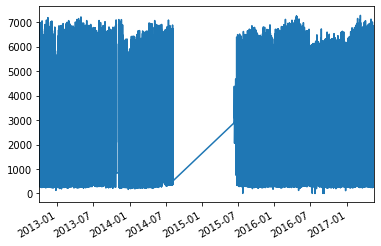

In [13]:
train['date_time'] = pd.to_datetime(train['date_time'], format="%Y-%m-%d %H:%M:%S")
train.index = train['date_time'].values

train[target].plot()

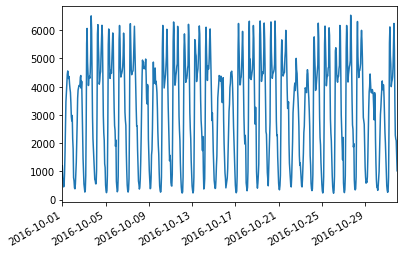

In [14]:
#Trend in one month
train[(train['date_time'].dt.year == 2016) & (train['date_time'].dt.month == 10)][target].plot()


Text(0.5, 1.0, 'Day 6')

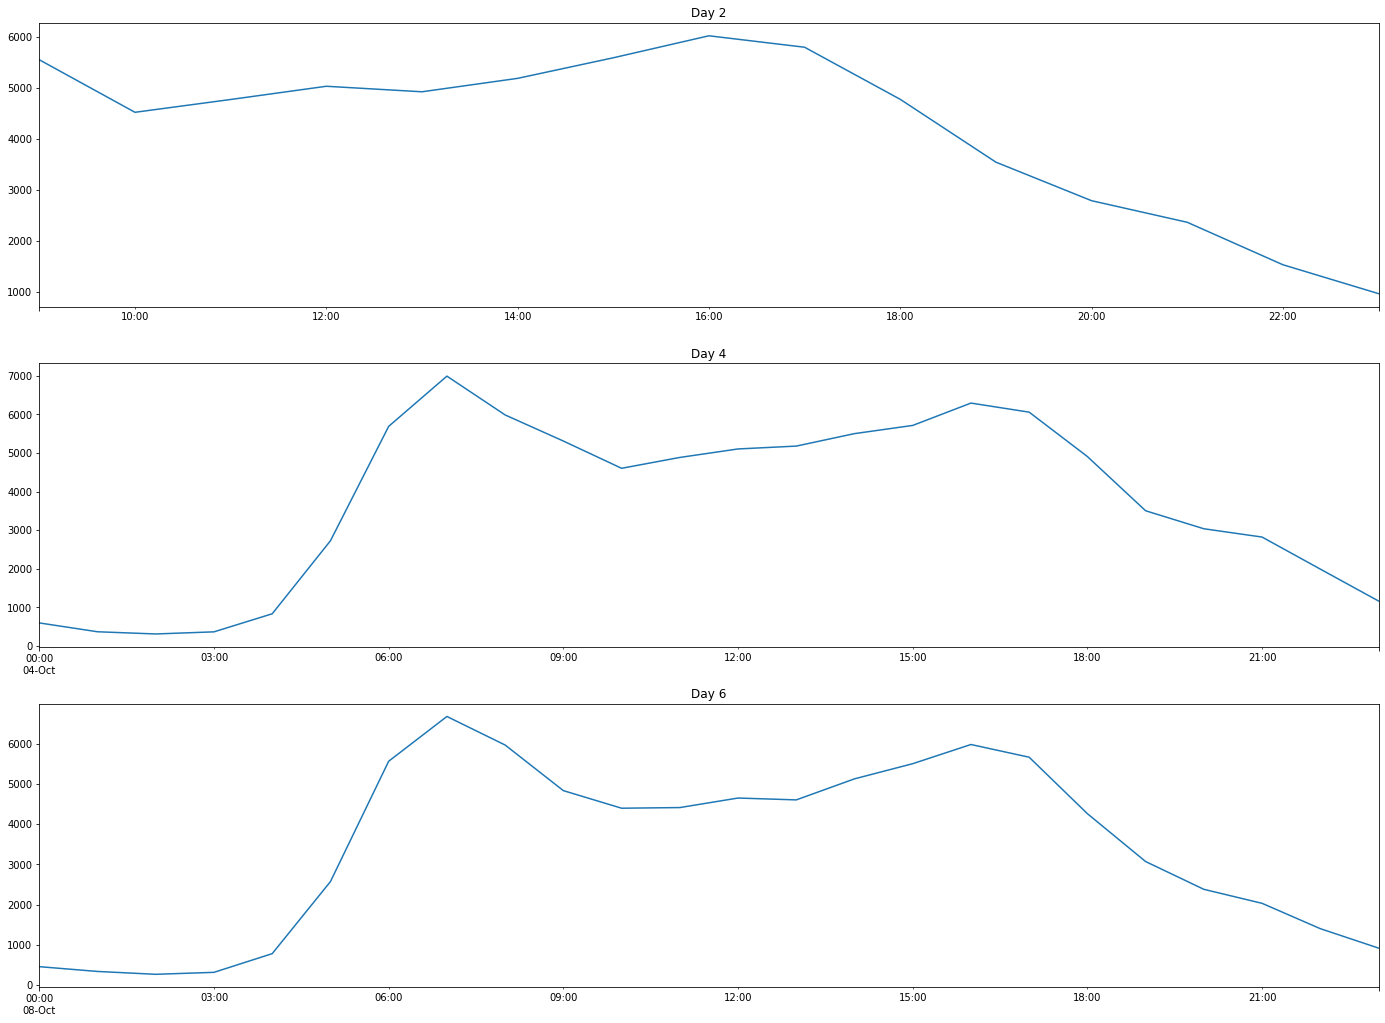

In [15]:
fig = plt.figure(figsize=(24, 24))
plt.subplot(4, 1, 1)

#Trend in per day
#Day 2
train[(train['date_time'].dt.year == 2012) & (train['date_time'].dt.month == 10) & (train['date_time'].dt.day ==2)][target].plot()
plt.title('Day 2')

plt.subplot(4, 1, 2)
#day 4
train[(train['date_time'].dt.year == 2012) & (train['date_time'].dt.month == 10) & (train['date_time'].dt.day==4)][target].plot()
plt.title('Day 4')

plt.subplot(4, 1, 3)
#Day 6
train[(train['date_time'].dt.year == 2012) & (train['date_time'].dt.month == 10) & (train['date_time'].dt.day==8)][target].plot()
plt.title('Day 6')

WE CAN SUGGEST THAT THE HIKE IN TRAFFIC VOLUME IS IN BETWEEN (6AM TO 12PM) AND THEN (12PM TO 4PM)

In [16]:
train.is_holiday.value_counts()

None                         28551
Christmas Day                    4
New Years Day                    4
Washingtons Birthday             4
Veterans Day                     4
Columbus Day                     4
Thanksgiving Day                 4
Labor Day                        3
Independence Day                 3
Memorial Day                     3
State Fair                       3
Martin Luther King Jr Day        2
Name: is_holiday, dtype: int64

Text(0.5, 1.0, 'Christmas Day')

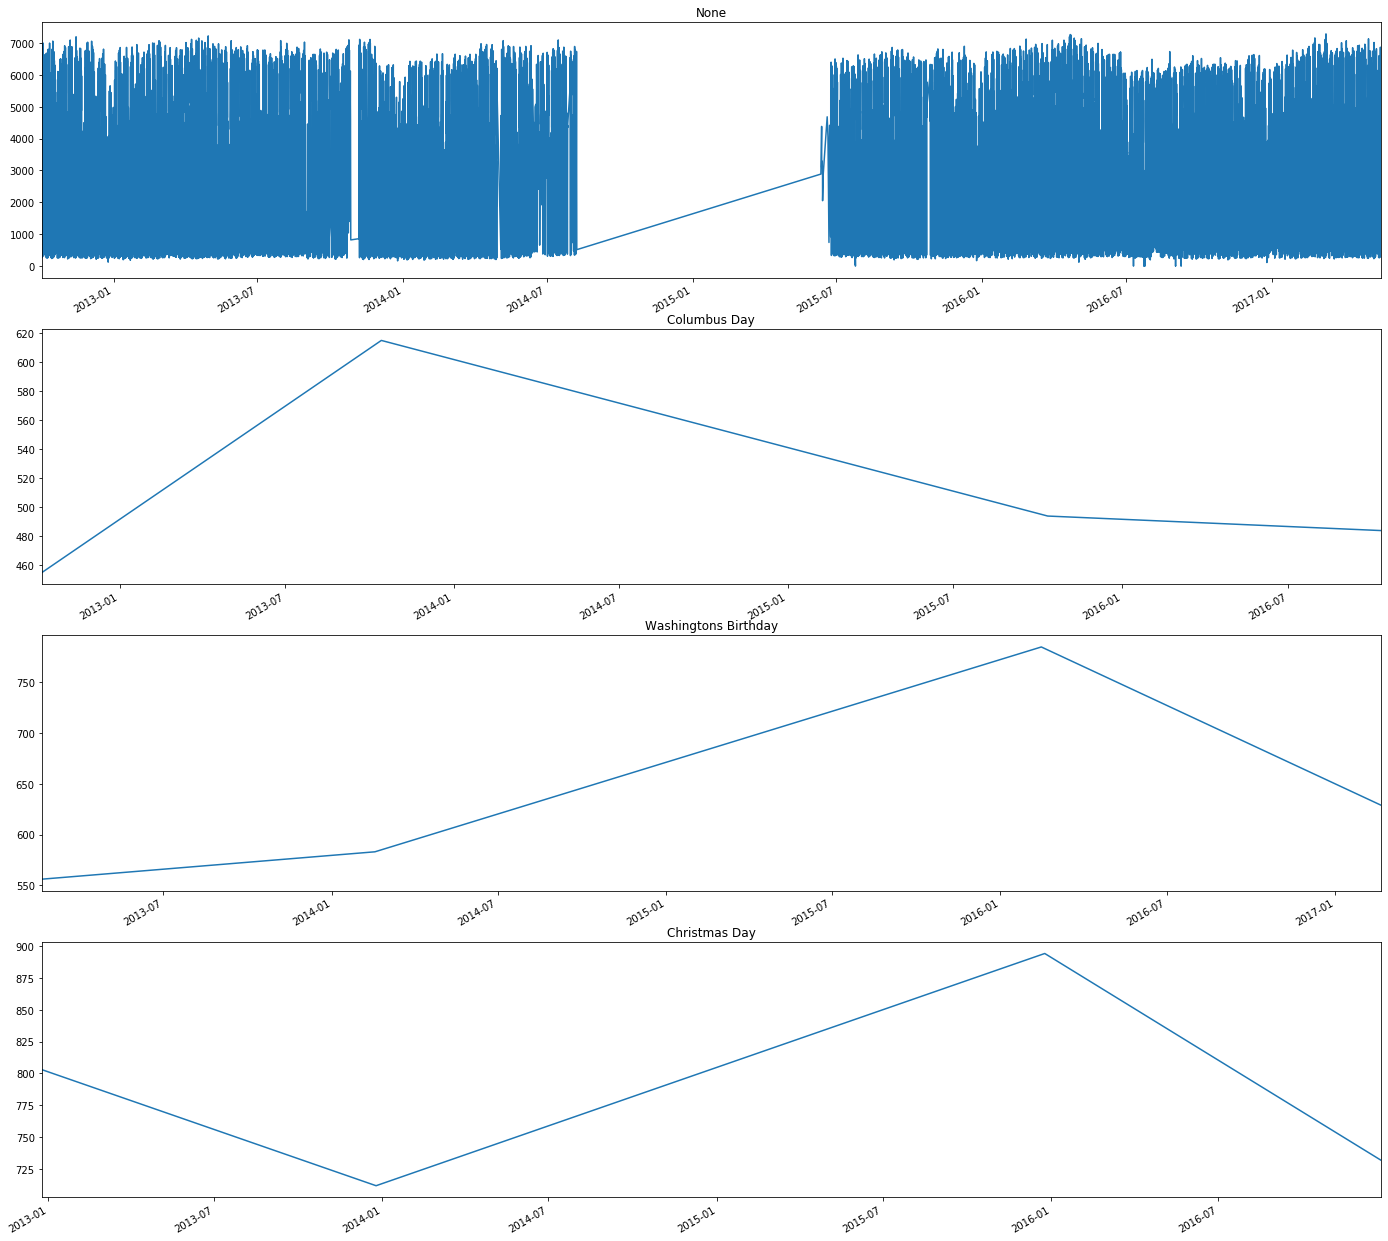

In [17]:
fig = plt.figure(figsize=(24,24))
plt.subplot(4,1,1)

train[train['is_holiday']=='None'][target].plot()
plt.title("None")

plt.subplot(4,1,2)

train[train['is_holiday']=='Columbus Day'][target].plot()
plt.title('Columbus Day')

plt.subplot(4,1,3)
train[train['is_holiday']=='Washingtons Birthday'][target].plot()
plt.title("Washingtons Birthday")

plt.subplot(4,1,4)
train[train['is_holiday']=='Christmas Day'][target].plot()
plt.title('Christmas Day')

Text(0.5, 1.0, 'Memorial Day ')

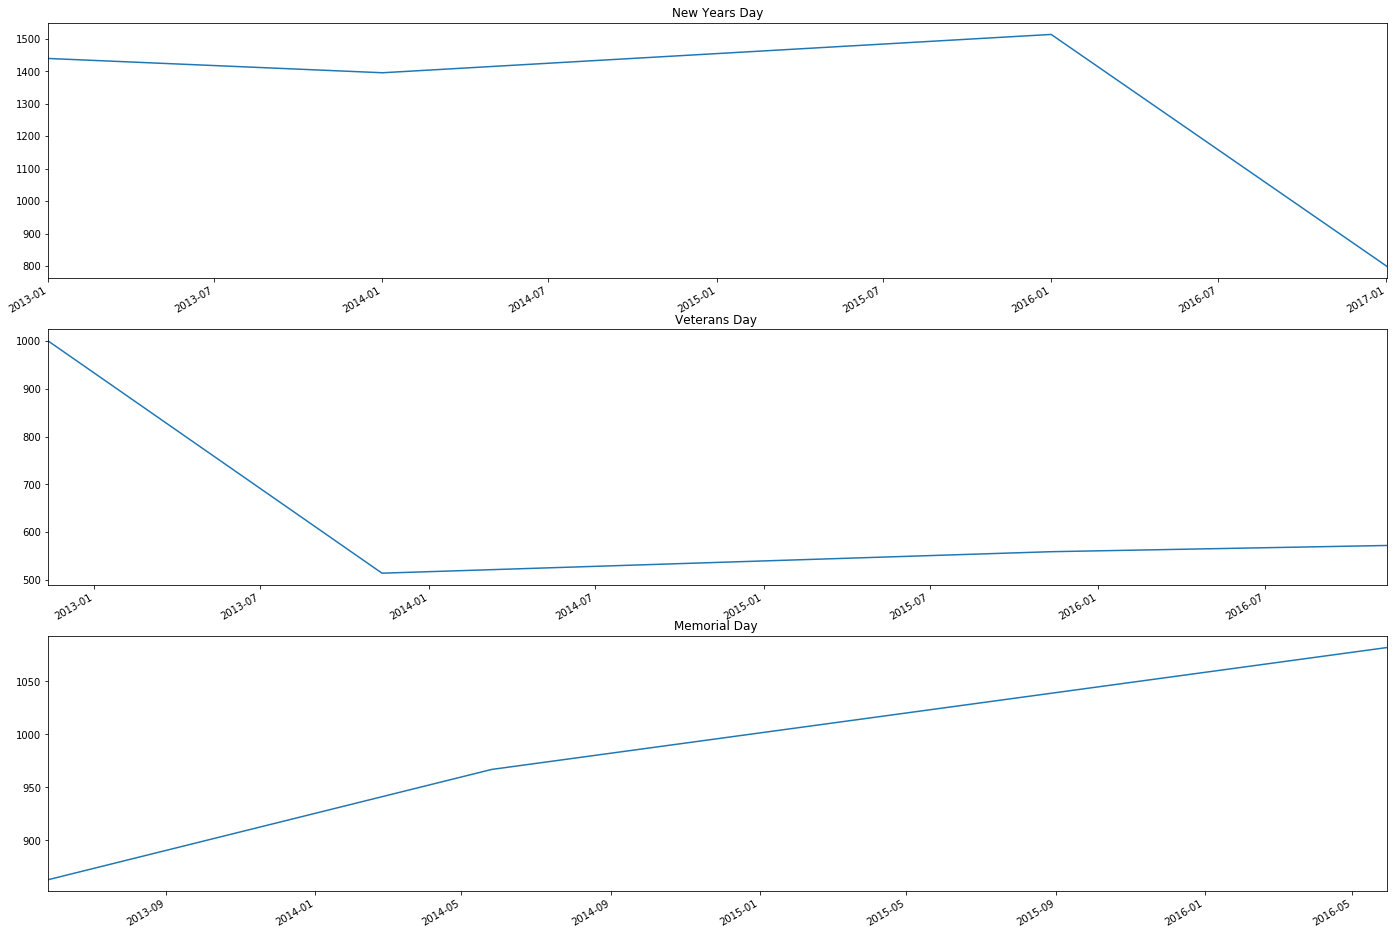

In [18]:
fig = plt.figure(figsize=(24,24))
plt.subplot(4,1,1)

train[train['is_holiday']=='New Years Day'][target].plot()
plt.title('New Years Day')

plt.subplot(4,1,2)
train[train['is_holiday']=='Veterans Day'][target].plot()
plt.title('Veterans Day ')

plt.subplot(4,1,3)
train[train['is_holiday']=='Memorial Day'][target].plot()
plt.title('Memorial Day ')

Text(0.5, 1.0, 'Martin Luther King Jr Day')

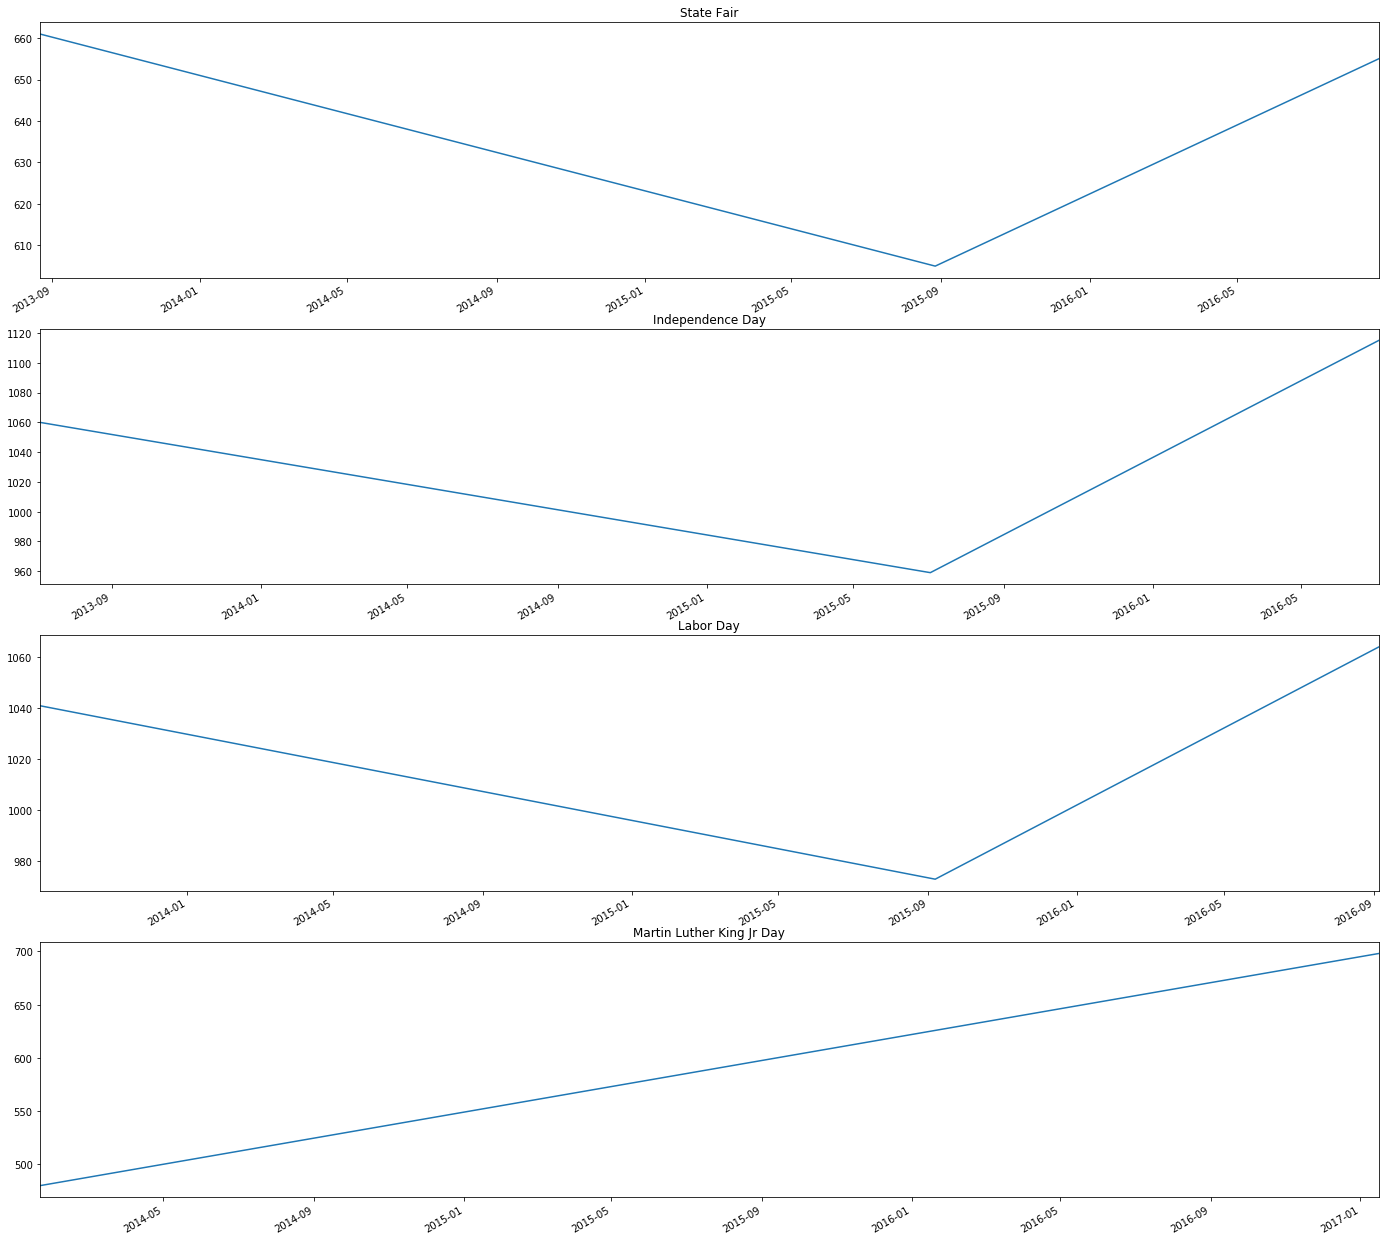

In [19]:
fig = plt.figure(figsize=(24,24))
plt.subplot(4,1,1)
train[train['is_holiday']=='State Fair'][target].plot()
plt.title('State Fair')

plt.subplot(4,1,2)
train[train['is_holiday']=='Independence Day'][target].plot()
plt.title('Independence Day')


plt.subplot(4,1,3)
train[train['is_holiday']=='Labor Day'][target].plot()
plt.title('Labor Day')

plt.subplot(4,1,4)
train[train['is_holiday']=='Martin Luther King Jr Day'][target].plot()
plt.title('Martin Luther King Jr Day')


Hourly Trends

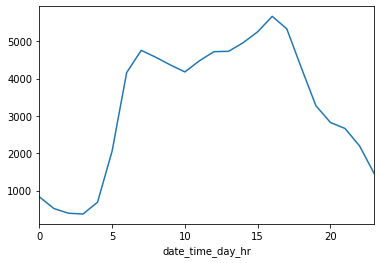

In [20]:
train['date_time_day_hr'] = train['date_time'].dt.hour
train.traffic_volume.groupby(train['date_time_day_hr']).mean().plot() 

Numeric Features

1.air_pollution_index

2.humidity

3.wind_speed

4.wind_direction

5.visibility_in_miles

6.dew_point

7.temperature

8.rain_p_h

9.snow_p_h

10.clouds_all

Target feature: traffic_volume

In [21]:
numeric_features =  ['air_pollution_index', 'humidity', 'wind_speed','wind_direction','visibility_in_miles','dew_point','temperature','rain_p_h', 'snow_p_h','clouds_all']

In [22]:
target = train['traffic_volume']

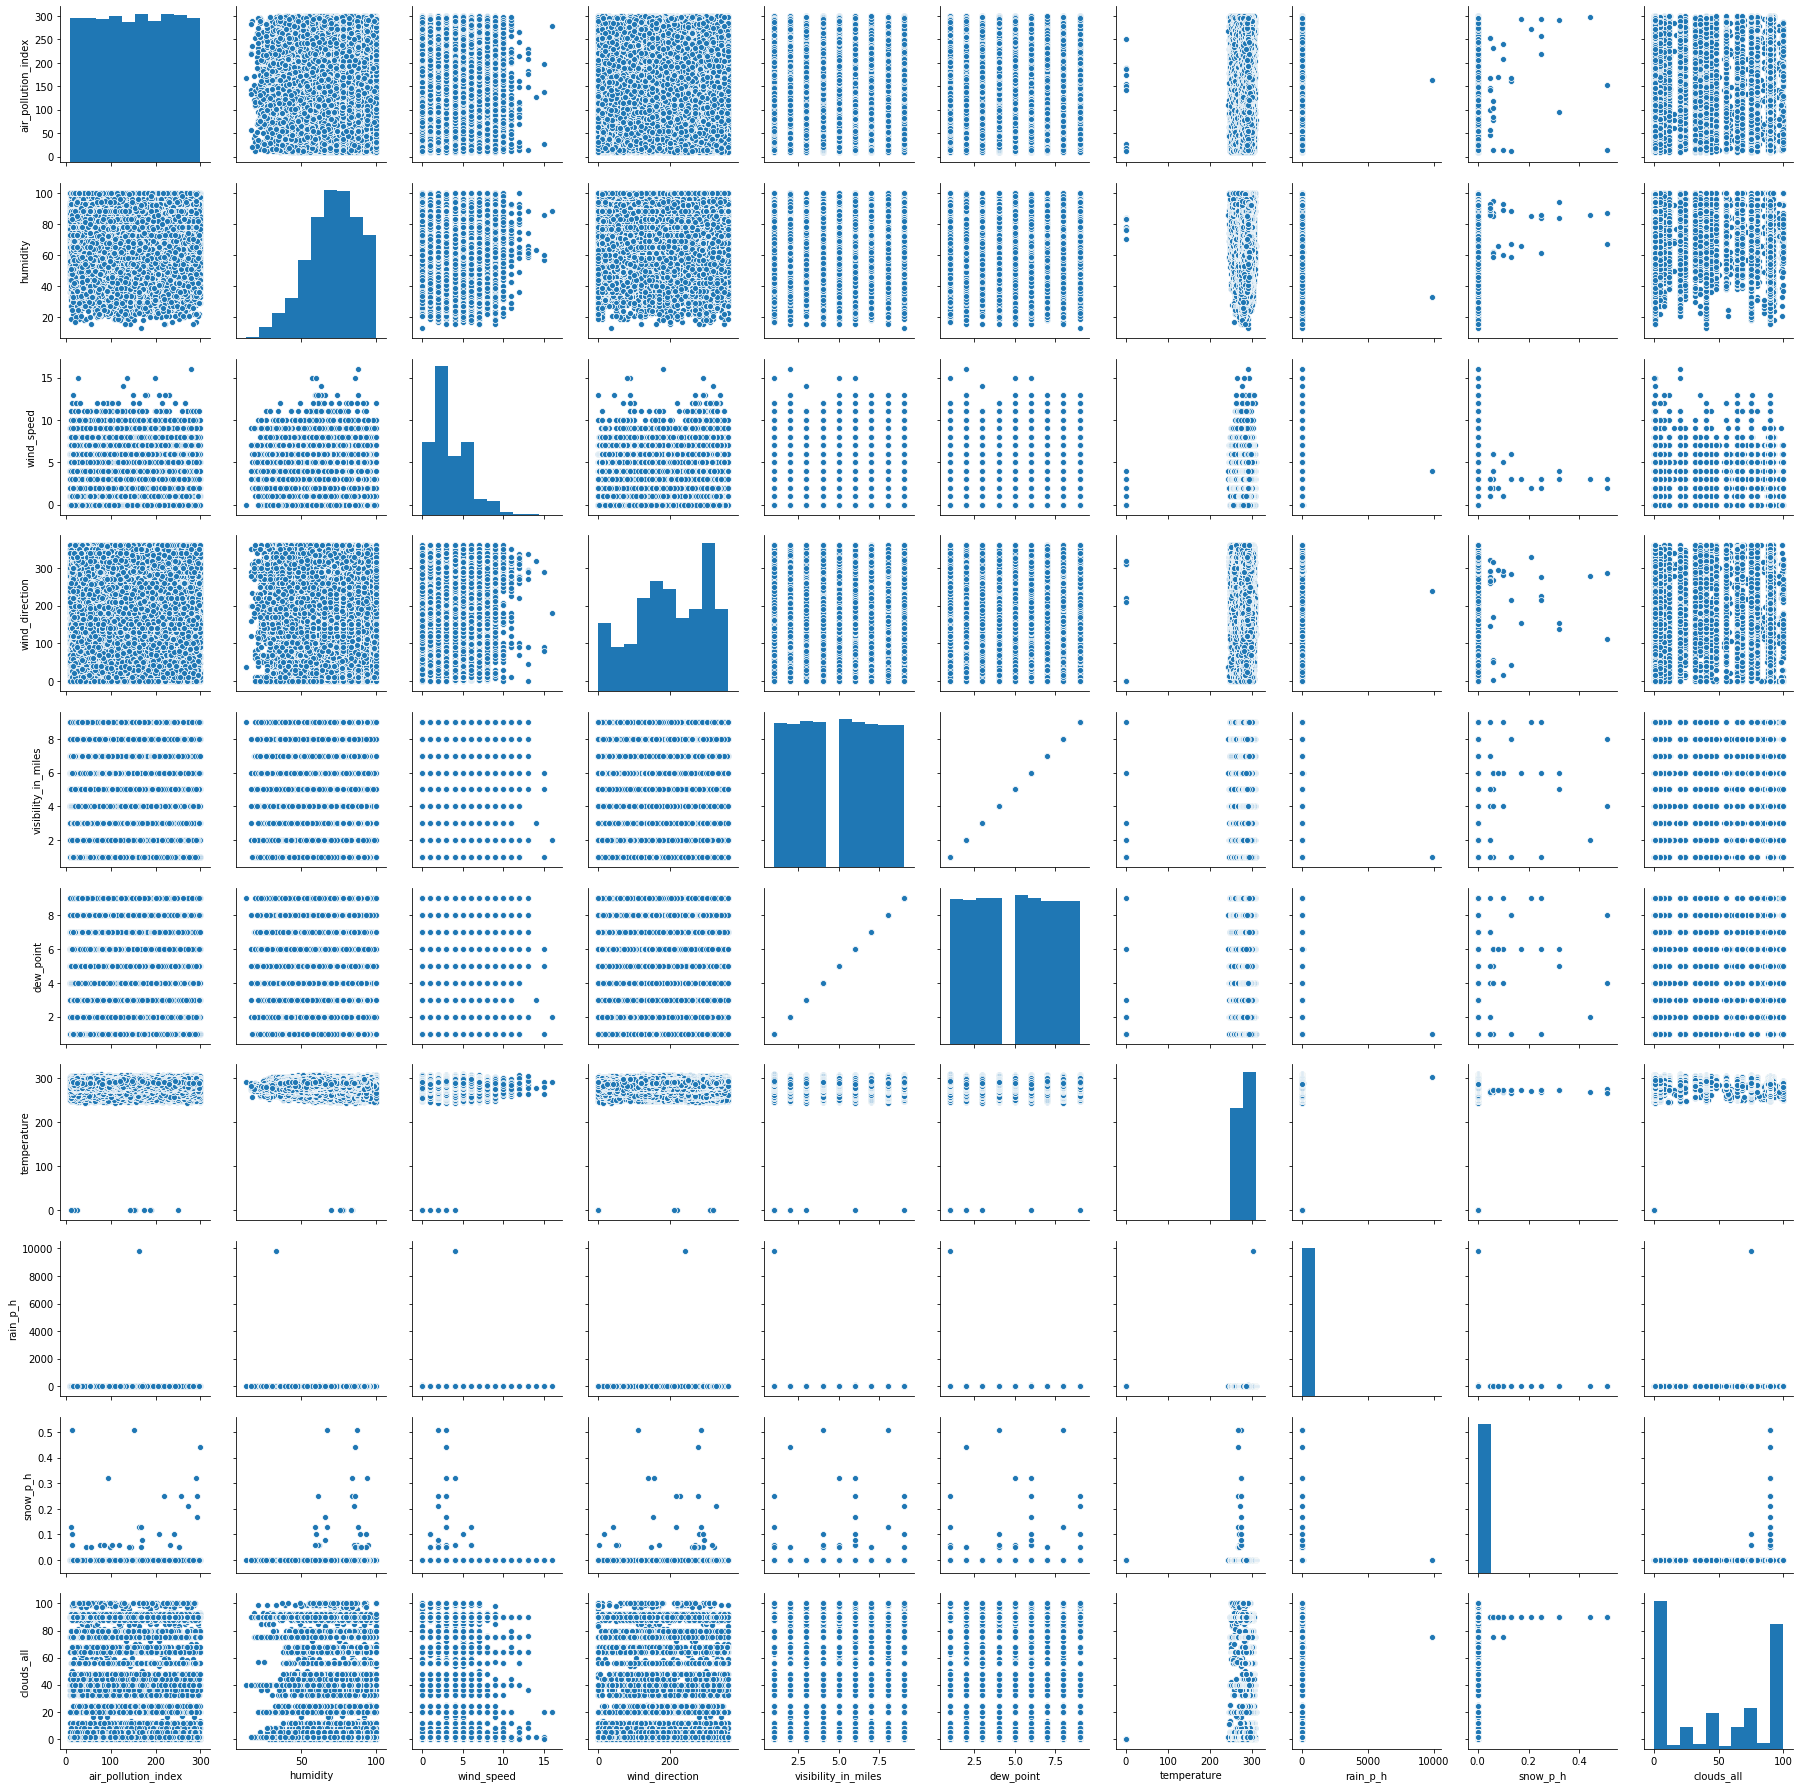

In [23]:
#Pairplot
sns.pairplot(train[numeric_features])

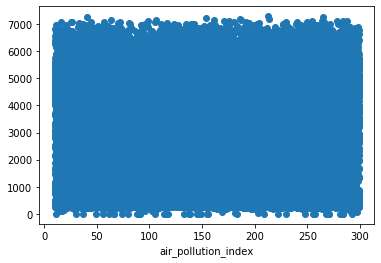

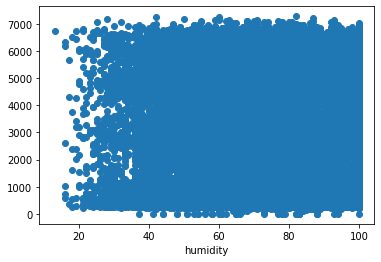

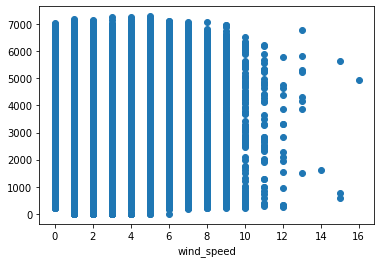

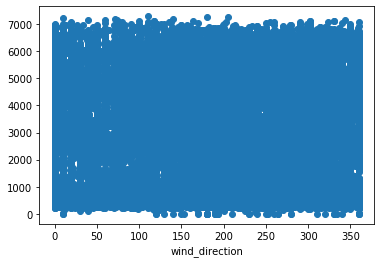

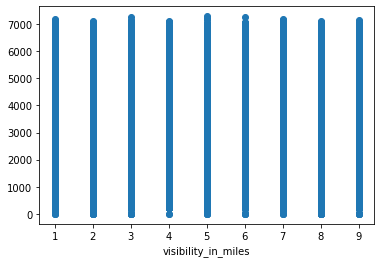

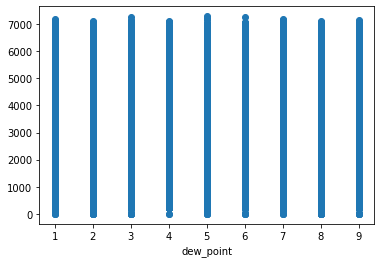

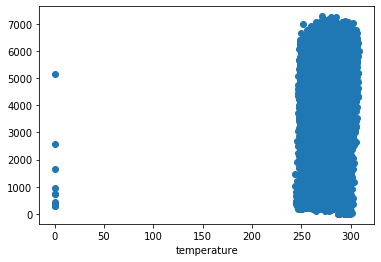

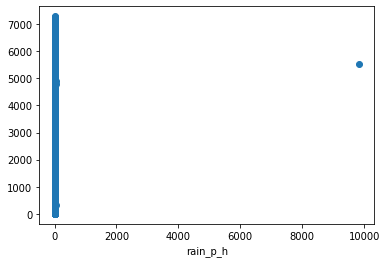

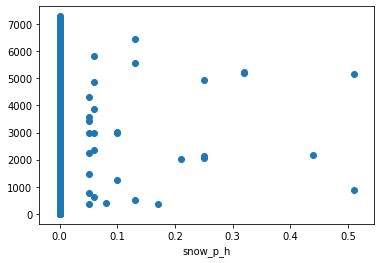

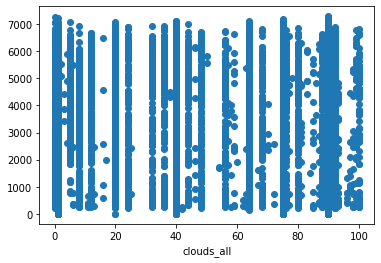

In [24]:
for i in numeric_features:
    plt.scatter(train[i], train['traffic_volume'])
    plt.xlabel(xlabel=i)
    plt.show()

In [25]:
train['rain_p_h'].max()~

9831.3

In [26]:
train['dew_point'].unique()

array([1, 2, 5, 7, 6, 3, 8, 4, 9])

In [27]:
train['visibility_in_miles'].unique()

array([1, 2, 5, 7, 6, 3, 8, 4, 9])

THIS IS THE BEST WAY TO FIND OUTLIERS IN GIVEN DATASET 

AS YOU CAN SEE IN RAIN_P_H GRAPH

CATEGORICAL VARIABLE 
-
1. is_holiday
2. weather_type
3. weather_description

In [28]:
cat_features = ['is_holiday','weather_type','weather_description']

Is_holiday

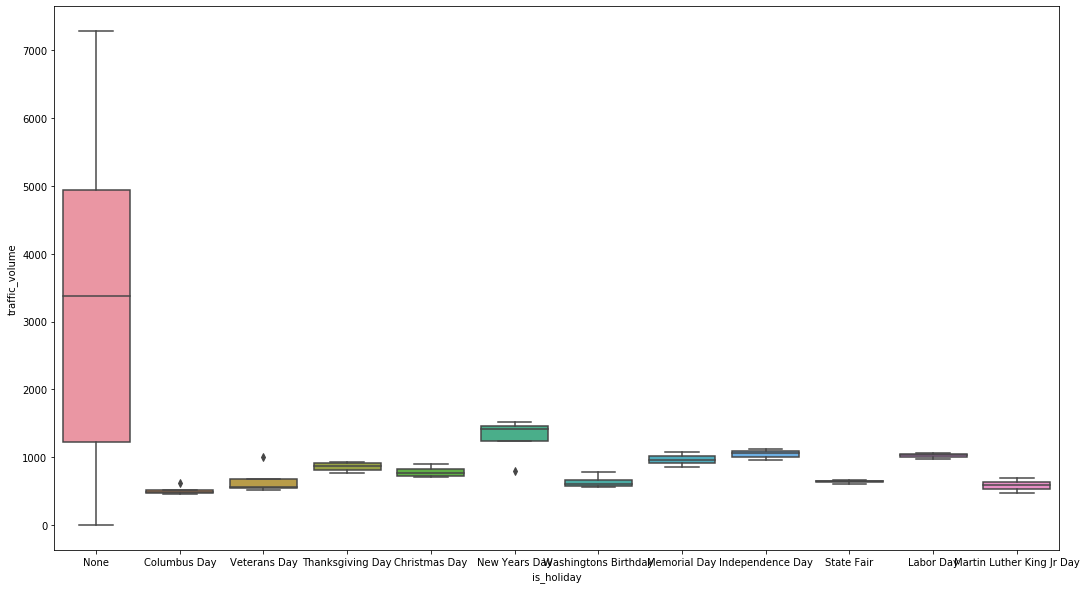

In [29]:
a4_dims = (18,10)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.boxplot(x=train['is_holiday'],y=target,data=train)

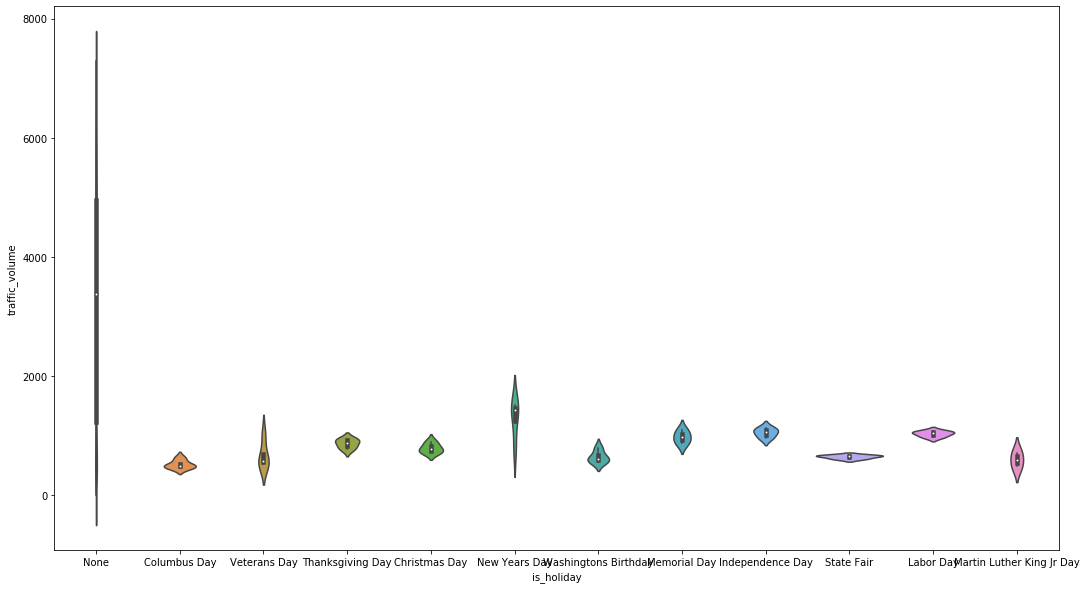

In [30]:
a4_dims = (18,10)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.violinplot(x=train['is_holiday'],y=target,data=train,ax = ax)

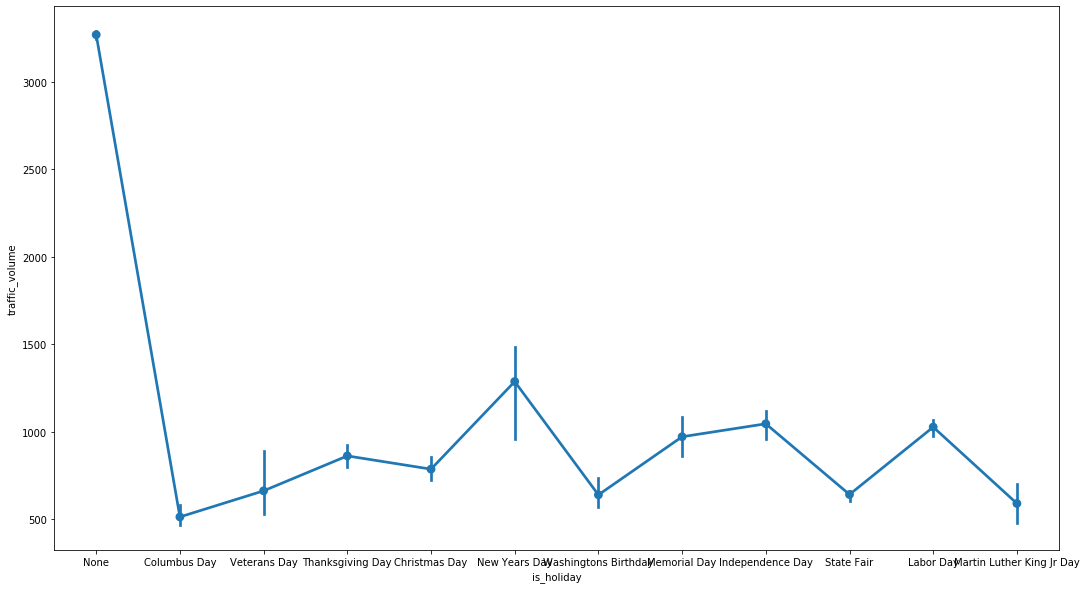

In [31]:
a4_dims = (18,10)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.pointplot(x='is_holiday',y ='traffic_volume',data = train) 

Points to be noted:
1. Traffic in non holidays is higher than holidays
2. Holiday traffic is not more than 2000
3. New Feature is generated weather it is holiday or not

WEATHER_TYPE AND WEATHER_DESCRIPTION

In [32]:
train.weather_type.value_counts()

Clouds          11175
Clear            9212
Rain             3329
Mist             2095
Snow             1583
Haze              548
Drizzle           329
Thunderstorm      180
Fog               124
Smoke              13
Squall              1
Name: weather_type, dtype: int64

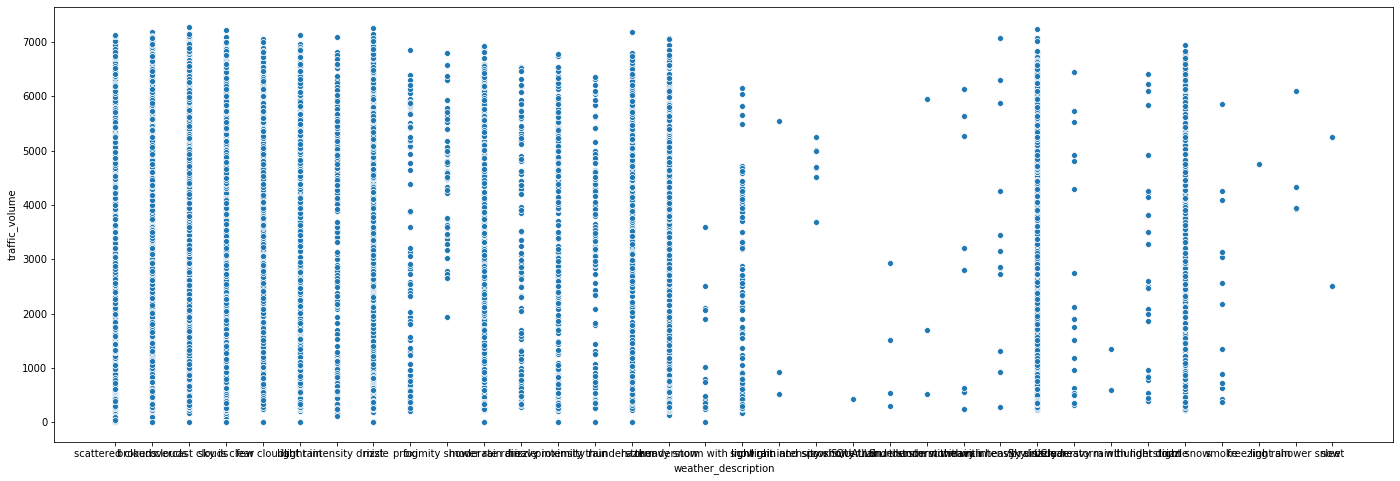

In [33]:
a4_dims = (24, 8)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.scatterplot(x = 'weather_description',y = 'traffic_volume',data=train,ax=ax)

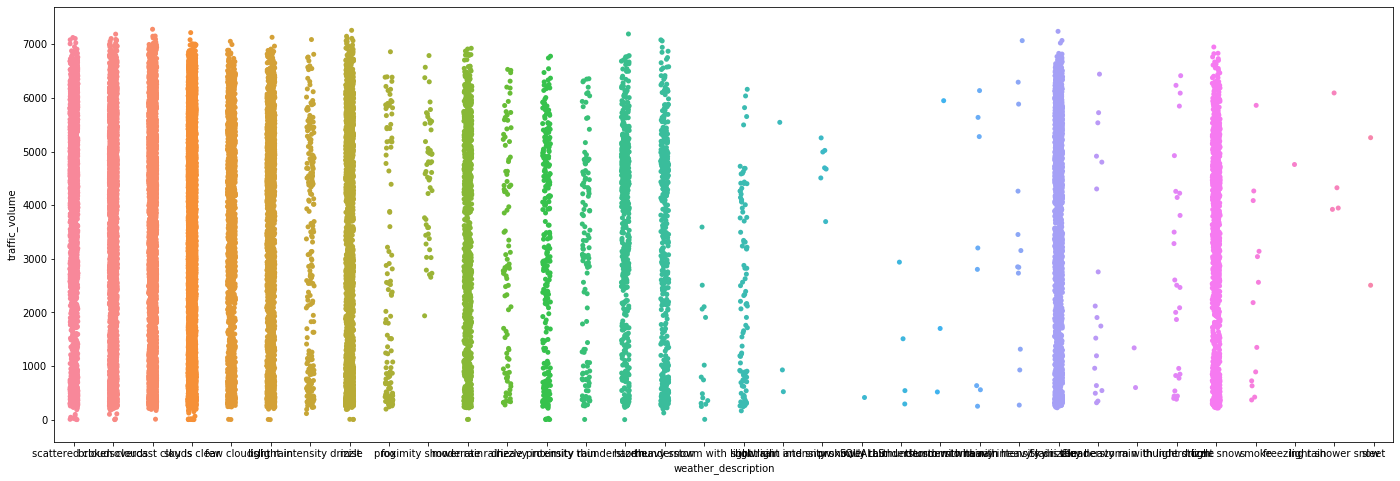

In [34]:
a4_dims = (24,8)
fig,ax = pyplot.subplots(figsize = a4_dims)
sns.stripplot(x=train['weather_description'],y=train['traffic_volume'],data = train)

We have to convert all weather description into lower case

Because sky is clear == Sky is Clear

In [35]:
train['weather_description'] = train['weather_description'].apply(lambda x:x.lower())

In [36]:
for i in train['weather_description'].unique():
    print(i,train[train['weather_description']==i].shape)

scattered clouds (2285, 16)
broken clouds (3364, 16)
overcast clouds (3964, 16)
sky is clear (9212, 16)
few clouds (1562, 16)
light rain (2059, 16)
light intensity drizzle (222, 16)
mist (2095, 16)
fog (124, 16)
proximity shower rain (51, 16)
moderate rain (910, 16)
drizzle (95, 16)
heavy intensity rain (283, 16)
proximity thunderstorm (122, 16)
haze (548, 16)
heavy snow (472, 16)
thunderstorm with light rain (15, 16)
snow (97, 16)
light rain and snow (3, 16)
light intensity shower rain (7, 16)
squalls (1, 16)
proximity thunderstorm with rain (4, 16)
thunderstorm with rain (3, 16)
thunderstorm with heavy rain (8, 16)
heavy intensity drizzle (12, 16)
very heavy rain (18, 16)
thunderstorm with light drizzle (2, 16)
thunderstorm (26, 16)
light snow (1005, 16)
smoke (13, 16)
freezing rain (1, 16)
light shower snow (4, 16)
sleet (2, 16)


AS YOU CAN SEE SOME WEATHER DISCRIPTION HAVE VERY LESS NUMBER OF DATA 

In [37]:
train.reset_index(drop=True,inplace=True)

In [38]:
train[train['weather_type']=='Squall']

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume,date_time_day_hr
4880,2013-05-12 02:00:00,None,110,100,2,202,8,8,284.28,0.0,0.0,75,Squall,squalls,420,2


In [39]:
train.drop(index = 4880,axis=0,inplace=True)

In [40]:
train.shape

(28588, 16)